# Домашняя работа
## ИССЛЕДОВАНИЕ ДАННЫХ HR-АГЕНТСТВА

### Постановка задачи
HR-агентство изучает тренды на рынке труда в IT. Компания хочет провести исследование на основе данных о зарплатах в сфере Data Science за 2020–2022 годы и получить некоторые выводы.

В процессе анализа вы должны ответить на ключевые вопросы HR-агентства:

* Наблюдается ли ежегодный рост зарплат у специалистов Data Scientist?
* Какие факторы влияют на зарплату у специалистов Data Scientist?
* Как соотносятся зарплаты Data Scientist и Data Engineer в различных компаниях?
* Есть ли связь между наличием должностей Data Scientist и Data Engineer и размером компании?
* Если вы найдёте в данных интересные закономерности, также отметьте их в своём анализе.

Продемонстрируйте использование разных тестов для проверки статистической значимости сделанных выводов:

* тесты для количественного признака:
    * для одной выборки;
    * для двух выборок;
    * для нескольких выборок;
    * тест для категориальных признаков.

Данные содержат следующие столбцы:

|НАИМЕНОВАНИЕ СТОЛБЦА|ОПИСАНИЕ|
|-|-|
|work_year|Год, в котором была выплачена зарплата.|
|experience_level|Опыт работы на этой должности в течение года со следующими возможными значениями:<br> EN — Entry-level/Junior; <br>MI — Mid-level/Intermediate; <br>SE — Senior-level/Expert; <br>EX — Executive-level/Director.|
|employment_type|Тип трудоустройства для этой роли:<br>PT — неполный рабочий день;<br>FT — полный рабочий день;<br>CT — контракт;<br>FL — фриланс.|
|job_title|Роль, в которой соискатель работал в течение года.|
|salary|Общая выплаченная валовая сумма заработной платы.|
|salary_currency|Валюта выплачиваемой заработной платы в виде кода валюты ISO 4217.|
|salary_in_usd|Зарплата в долларах США (валютный курс, делённый на среднее значение курса доллара США за соответствующий год через fxdata.foorilla.com)|
|employee_residence|Основная страна проживания сотрудника в течение рабочего года в виде кода страны ISO 3166.|
|remote_ratio|Общий объём работы, выполняемой удалённо. Возможные значения:<br>0 — удалённой работы нет (менее 20 %);<br>50 — частично удалённая работа;<br>100 — полностью удалённая работа (более 80 %).|
|company_location|Страна главного офиса работодателя или филиала по контракту в виде кода страны ISO 3166.|
|company_size|Среднее количество людей, работавших в компании в течение года:<br>S — менее 50 сотрудников (небольшая компания);<br>M — от 50 до 250 сотрудников (средняя компания);<br>L — более 250 сотрудников (крупная компания).|

[Скачать данные](https://lms-cdn.skillfactory.ru/assets/courseware/v1/9e84f30c5bc84881a5e33262d5e32a8b/asset-v1:SkillFactory+DSPR-2.0+14JULY2021+type@asset+block/ds_salaries.zip)    

### Загрузка данных

In [109]:
# импортируем библиотеки:
import pandas as pd
import numpy as np

from scipy import stats
import statsmodels.api as sm
from statsmodels import stats as sms
import category_encoders as ce

import matplotlib.pyplot as plt
import seaborn as sns

# настройки визуализации сделаем как в скринкасте:
sns.set_theme("notebook") 
sns.set_palette("Set2") 

#### <u>1. Загрузка и обработка данных (2 балла)</u>
Студент корректно загрузил данные:

In [110]:
# загружаем датасет
data = pd.read_csv('ds_salaries.csv', index_col=[0])
display(data.head())
display(data.tail())

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M
603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M
604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M
605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M
606,2022,MI,FT,AI Scientist,200000,USD,200000,IN,100,US,L


* Студент проверил датасет на наличие пропусков и дубликатов, а также на корректность типов данных столбцов.

In [111]:
# выводим сведения о датасете
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 607 entries, 0 to 606
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           607 non-null    int64 
 1   experience_level    607 non-null    object
 2   employment_type     607 non-null    object
 3   job_title           607 non-null    object
 4   salary              607 non-null    int64 
 5   salary_currency     607 non-null    object
 6   salary_in_usd       607 non-null    int64 
 7   employee_residence  607 non-null    object
 8   remote_ratio        607 non-null    int64 
 9   company_location    607 non-null    object
 10  company_size        607 non-null    object
dtypes: int64(4), object(7)
memory usage: 56.9+ KB


In [112]:
# Проверяем датасет на наличие дубликатов и избавляемся о них
print(f'Количество дубликатов в датасете: {data[data.duplicated()].shape[0]}')
data.drop_duplicates(inplace=True)
print(f'Количество строк после удаления дубликатов составляет: {format(data.shape[0])}')

Количество дубликатов в датасете: 42
Количество строк после удаления дубликатов составляет: 565


#### Вывод:
При визуальном осмотре сведений датасета выявлено, что тип данных определён верно, размер датасета позволяет визуально определить отсутствие пропусков. Произвёл поиск дубликатов, их оказалось 42. Удалил дубликаты.

* Студент определил в данных неинформативные признаки, которые не будут участвовать в исследовании.

In [113]:
# Удаляем неинформативные признаки
data.drop(['salary','salary_currency'],axis=1,inplace=True)
display(data.head())

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,US,50,US,L


#### Вывод:
Удалил признаки 'salary' и 'salary_currency' они содержали информацию о размере зарплаты и её валюте. В наборе данных присутствует более удобный и информативный признак 'salary_in_usd' который содержит информацию о зарплатах приведённую к общему виду.

* Студент классифицировал все признаки на числовые и дискретные.
#### Вывод:
| НАИМЕНОВАНИЕ СТОЛБЦА|ТИП|КОЛ-ВО ПРИЗНАКОВ|
|-|-|-|
| work_year|числовой|n/a|
| experience_level|дискретный|4|
| employment_type|дискретный|4|
| job_title|дискретный|50|
| salary_in_usd|числовой|n/a|
| employee_residence|дискретный|57|
| remote_ratio|дискретный|3|
| company_location|дискретный|50|
| company_size|дискретный|3|

* Студент нашёл основные статистические характеристики для каждого из признаков.

In [114]:
# Выводим статистические характеристики
data.describe(include='all')

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
count,565.000000,565,565,565,565.000000,565,565.000000,565,565
unique,NaN,4,4,50,NaN,57,NaN,50,3
top,NaN,SE,FT,Data Scientist,NaN,US,NaN,US,M
freq,NaN,243,546,130,NaN,295,NaN,318,290
mean,2021.364602,NaN,NaN,NaN,110610.343363,NaN,69.911504,NaN,NaN
std,0.698138,NaN,NaN,NaN,72280.702792,NaN,40.900666,NaN,NaN
min,2020.000000,NaN,NaN,NaN,2859.000000,NaN,0.000000,NaN,NaN
25%,2021.000000,NaN,NaN,NaN,60757.000000,NaN,50.000000,NaN,NaN
50%,2021.000000,NaN,NaN,NaN,100000.000000,NaN,100.000000,NaN,NaN
75%,2022.000000,NaN,NaN,NaN,150000.000000,NaN,100.000000,NaN,NaN


#### Вывод:
Вывел статистические характеристики всех колонок при помощи метода .describe

#### <u>2. Разведывательный анализ данных (4 балла)</u>

In [115]:
# задаём уровень значимости
alpha = 0.05 
print("Уровень значимости alpha = {:.2f}".format(alpha))

Уровень значимости alpha = 0.05


Рассчёты буду производить непосредственно для профессий Data Scientist и Data Engineer.

### <u>2.1. Визуальный анализ данных (2 балла)</u>

Проанализирую признаки 'work_year' и 'salary_in_usd' определю ежегодное изменение зарплаты , а также отвечу на первый вопрос "Наблюдается ли ежегодный рост зарплат у специалистов Data Scientist?"

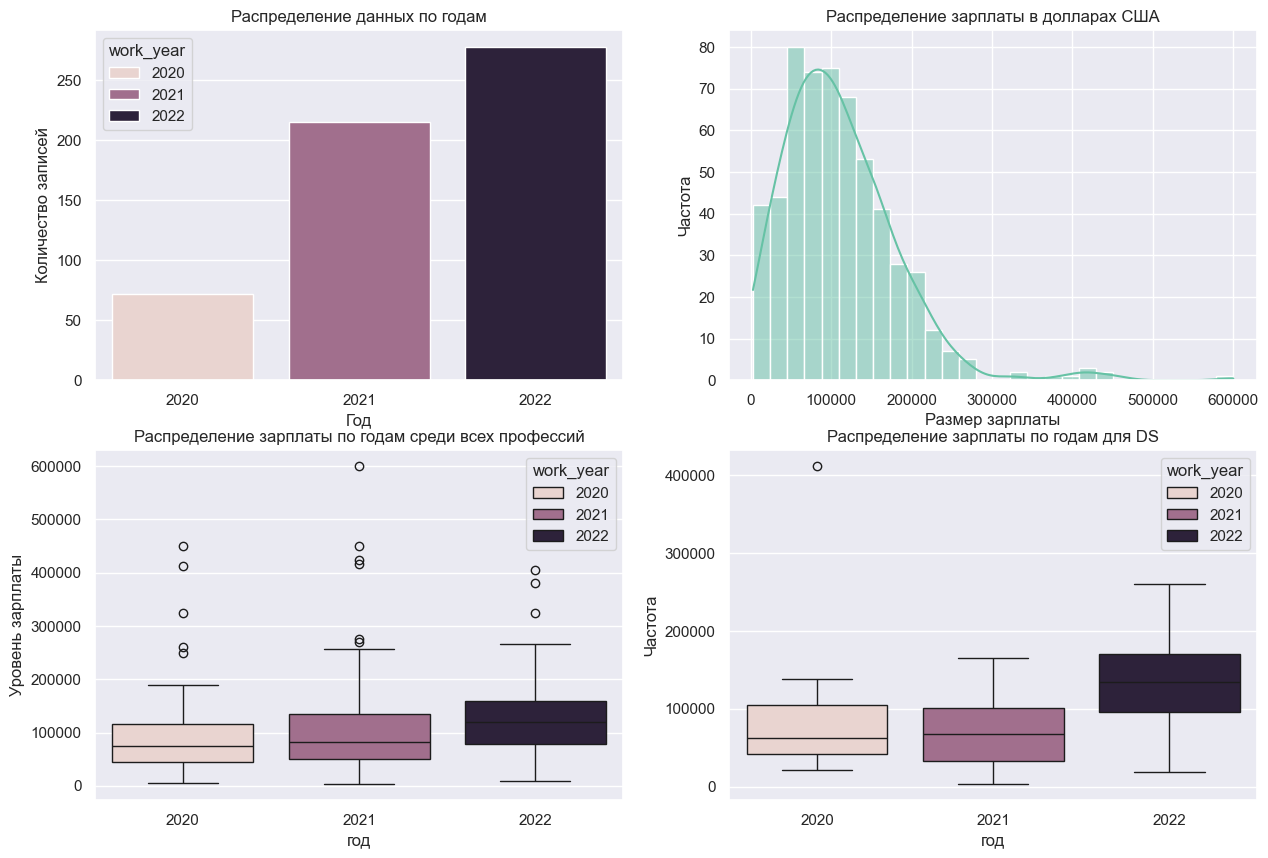

In [116]:
# Строим графики
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

axes[0][0] = sns.countplot(data, x='work_year', ax=axes[0][0], hue='work_year')
axes[0][0].set(xlabel='Год', ylabel='Количество записей')
axes[0][0].set_title('Распределение данных по годам')



axes[0][1] = sns.histplot(data['salary_in_usd'], kde=True, ax=axes[0][1])
axes[0][1].set(xlabel='Размер зарплаты', ylabel='Частота')
axes[0][1].set_title('Распределение зарплаты в долларах США')

axes[1][0] = sns.boxplot(data, x='work_year', y='salary_in_usd', ax=axes[1][0], hue='work_year')
axes[1][0].set(xlabel='год', ylabel='Уровень зарплаты')
axes[1][0].set_title('Распределение зарплаты по годам среди всех профессий')

axes[1][1] = sns.boxplot(data[data['job_title'] == 'Data Scientist'], x='work_year', y='salary_in_usd', ax=axes[1][1], hue='work_year')
axes[1][1].set(xlabel='год', ylabel='Частота')
axes[1][1].set_title('Распределение зарплаты по годам для DS')


plt.show()

### Вывод:
Большинство записей в датасете приходится на 2021 и 2022 год. На графике Распределение заработной платы в USD имеются выбросы следовательно распределение не является нормальным. Визуальный анализ показывает что основное количество записей приходится на диапазон 50-100 тыс. долларов в год. Из графика Распределению зарплаты по годам среди всех профессий видно, что уровень заработной ежегодно увеличивается, также имеются выбросы. Самый большой приходится на 2021 год.
Относительно графика Распределениязарплаты по годам для DS, можно сделать вывод о снижении уровня зарплаты в 2021 году.

Проанализирую признак 'experience_level' - уровень квалификации

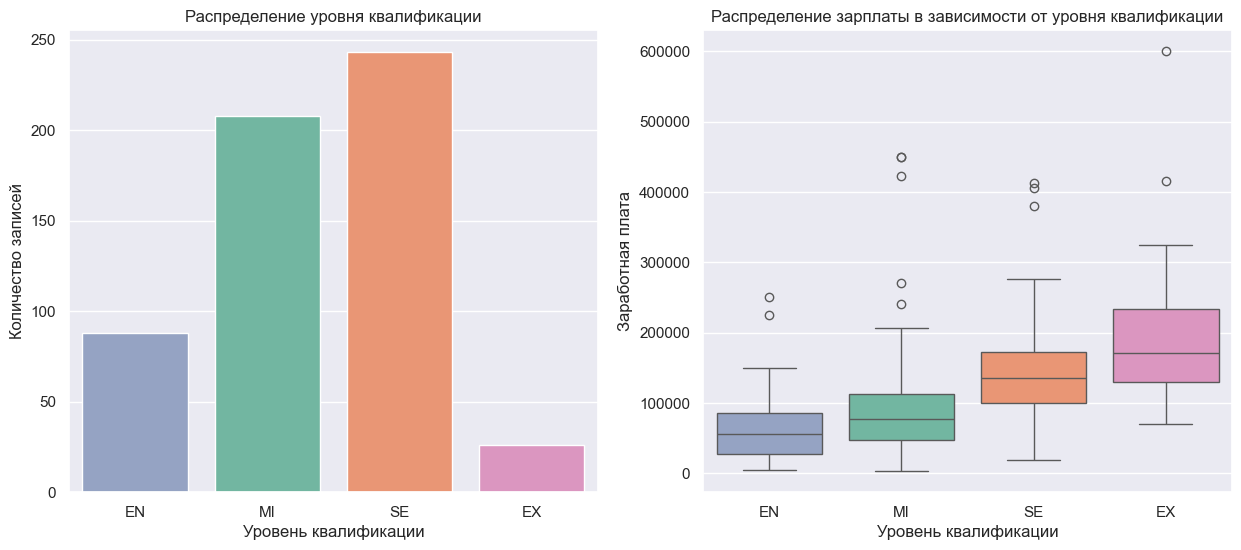

In [117]:
# Строим графики
order = ['EN', 'MI', 'SE', 'EX']

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

axes[0] = sns.countplot(data, x='experience_level', order = order, ax=axes[0], hue='experience_level')
axes[0].set(xlabel='Уровень квалификации', ylabel='Количество записей')
axes[0].set_title('Распределение уровня квалификации')


axes[1] = sns.boxplot(data, x='experience_level', y='salary_in_usd', order = order, ax=axes[1], hue='experience_level')
axes[1].set(xlabel='Уровень квалификации', ylabel='Заработная плата')
axes[1].set_title('Распределение зарплаты в зависимости от уровня квалификации')

plt.show()

#### Вывод:

Из графиков видно, больше всего специальностей приходятся на группы миддл и сениор (MI, SE), очень мало специалистов уровня эксперта(EX). Уровень заработной платы растёт в зависимости с ростом квалификации. Так например медиана уровня заработной платы каждого последующего уровня примерно равна или выше верхнего квантиля предыдущего уровня.
Самые высокие зарплаты у специалистов уровня эксперт.

Проанализирую признак 'job_title' - должность.

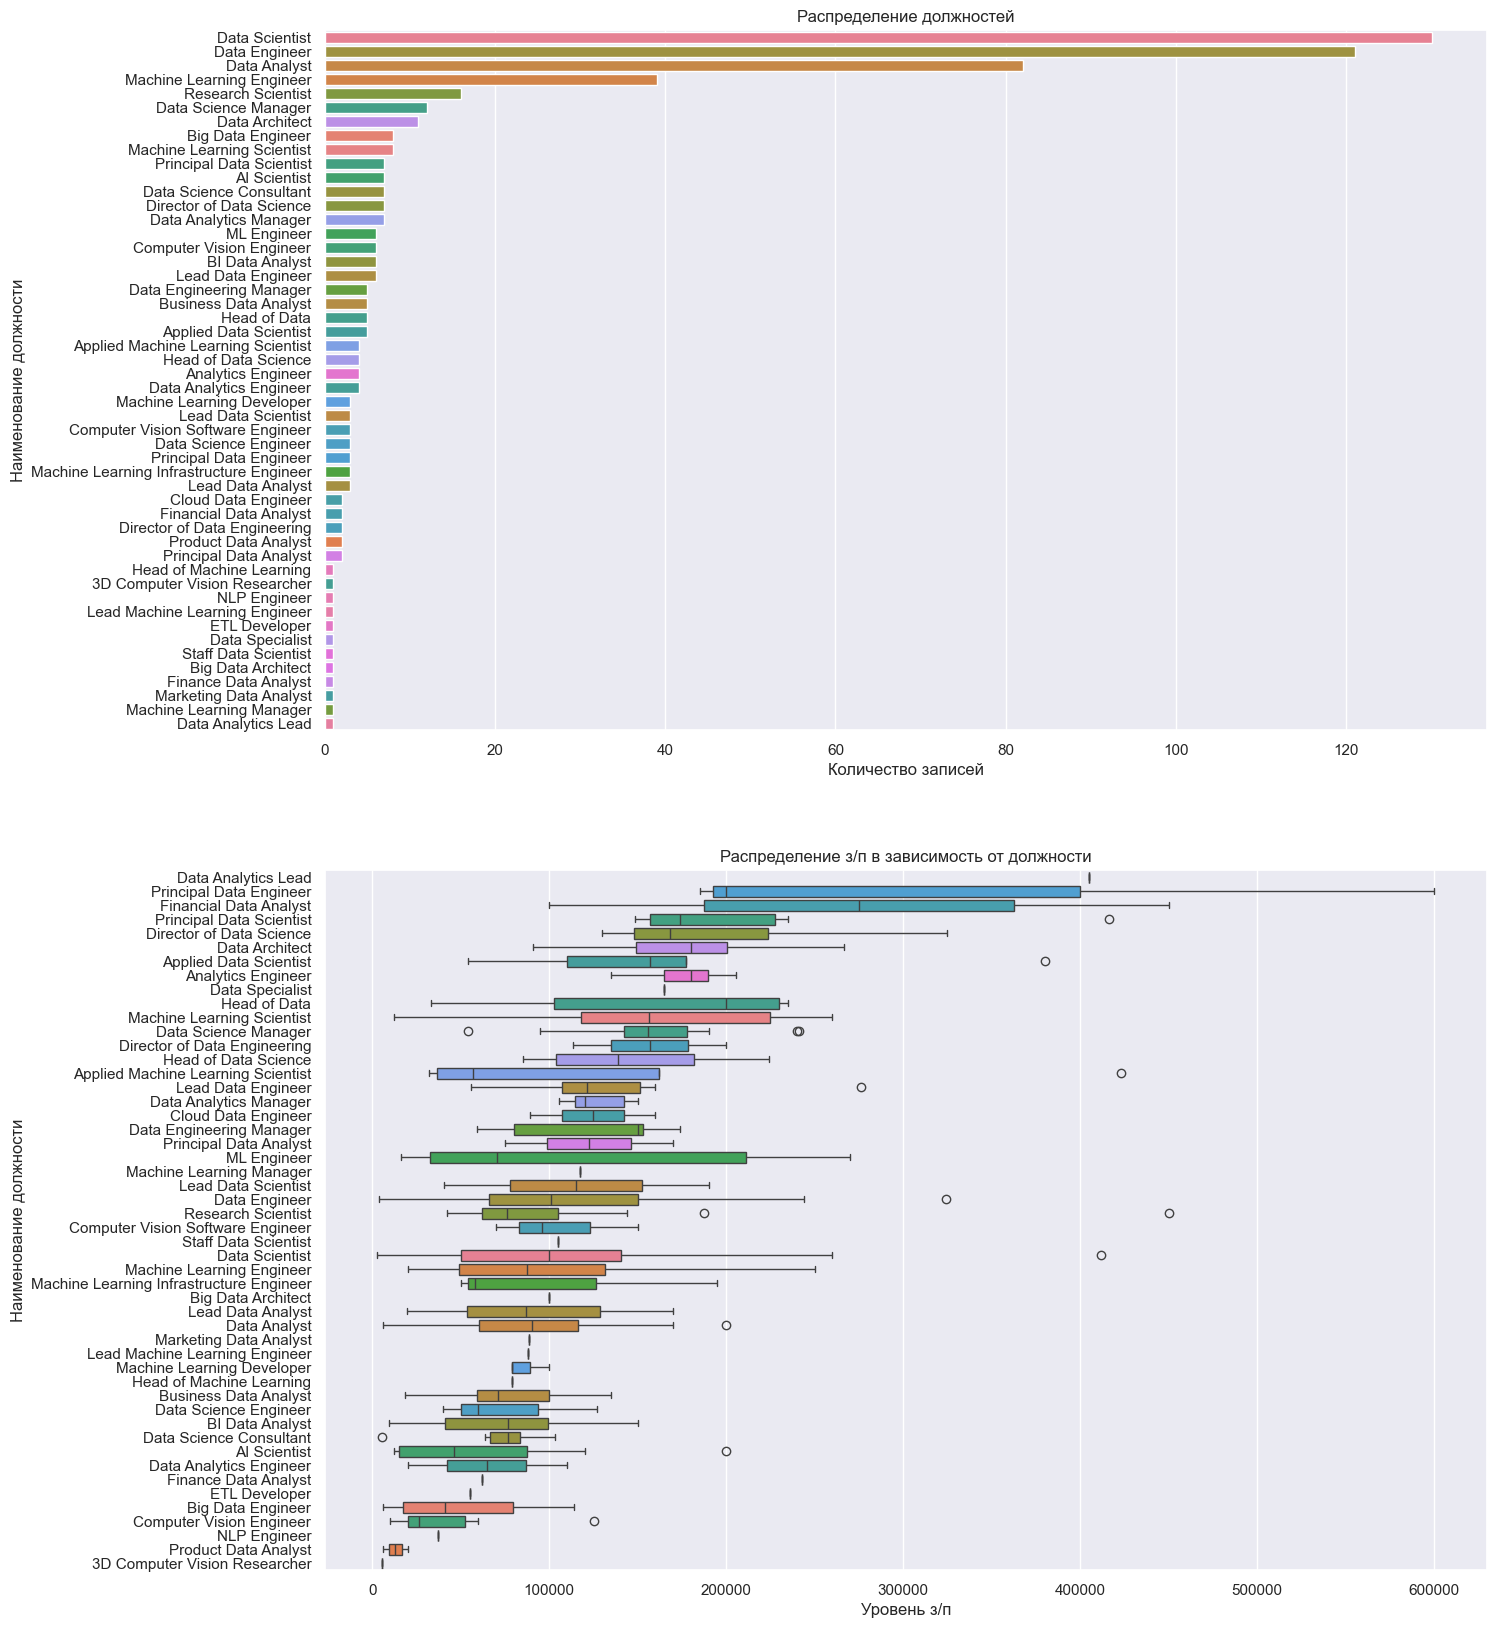

In [118]:
# Строим графики
fig, axes = plt.subplots(2, 1, figsize=(15, 20))

axes[0] = sns.countplot(data, y='job_title', ax=axes[0], order=data['job_title'].value_counts().index, hue='job_title')
axes[0].set(xlabel='Количество записей', ylabel='Наименование должности')
axes[0].set_title('Распределение должностей')

# Считаем среднее для сортировки коробчатой диаграммы
mean_by_salary = data.groupby(['job_title'])['salary_in_usd'].mean().sort_values(ascending=False)

axes[1] = sns.boxplot(data, y='job_title', x='salary_in_usd', order=mean_by_salary.index, ax=axes[1], hue='job_title')
axes[1].set(xlabel='Уровень з/п', ylabel='Наименование должности')
axes[1].set_title('Распределение з/п в зависимость от должности')

plt.show()

#### Вывод:
На построенном и отсортированном графике выделим ТОП-5 профессий: Data Scientist, Data Engineer, Data Analyst, Maschine Learning Engineer, Research Scientist.
Уровень заработной платы у этих профессий находится примерно в одной плоскости по отношению к другим, самые высокооплачиваемые профессии это Principal Data Scientist и Financial Data Analyst

Проанализирую признак 'employee_residence' - страна проживания сотрудника.

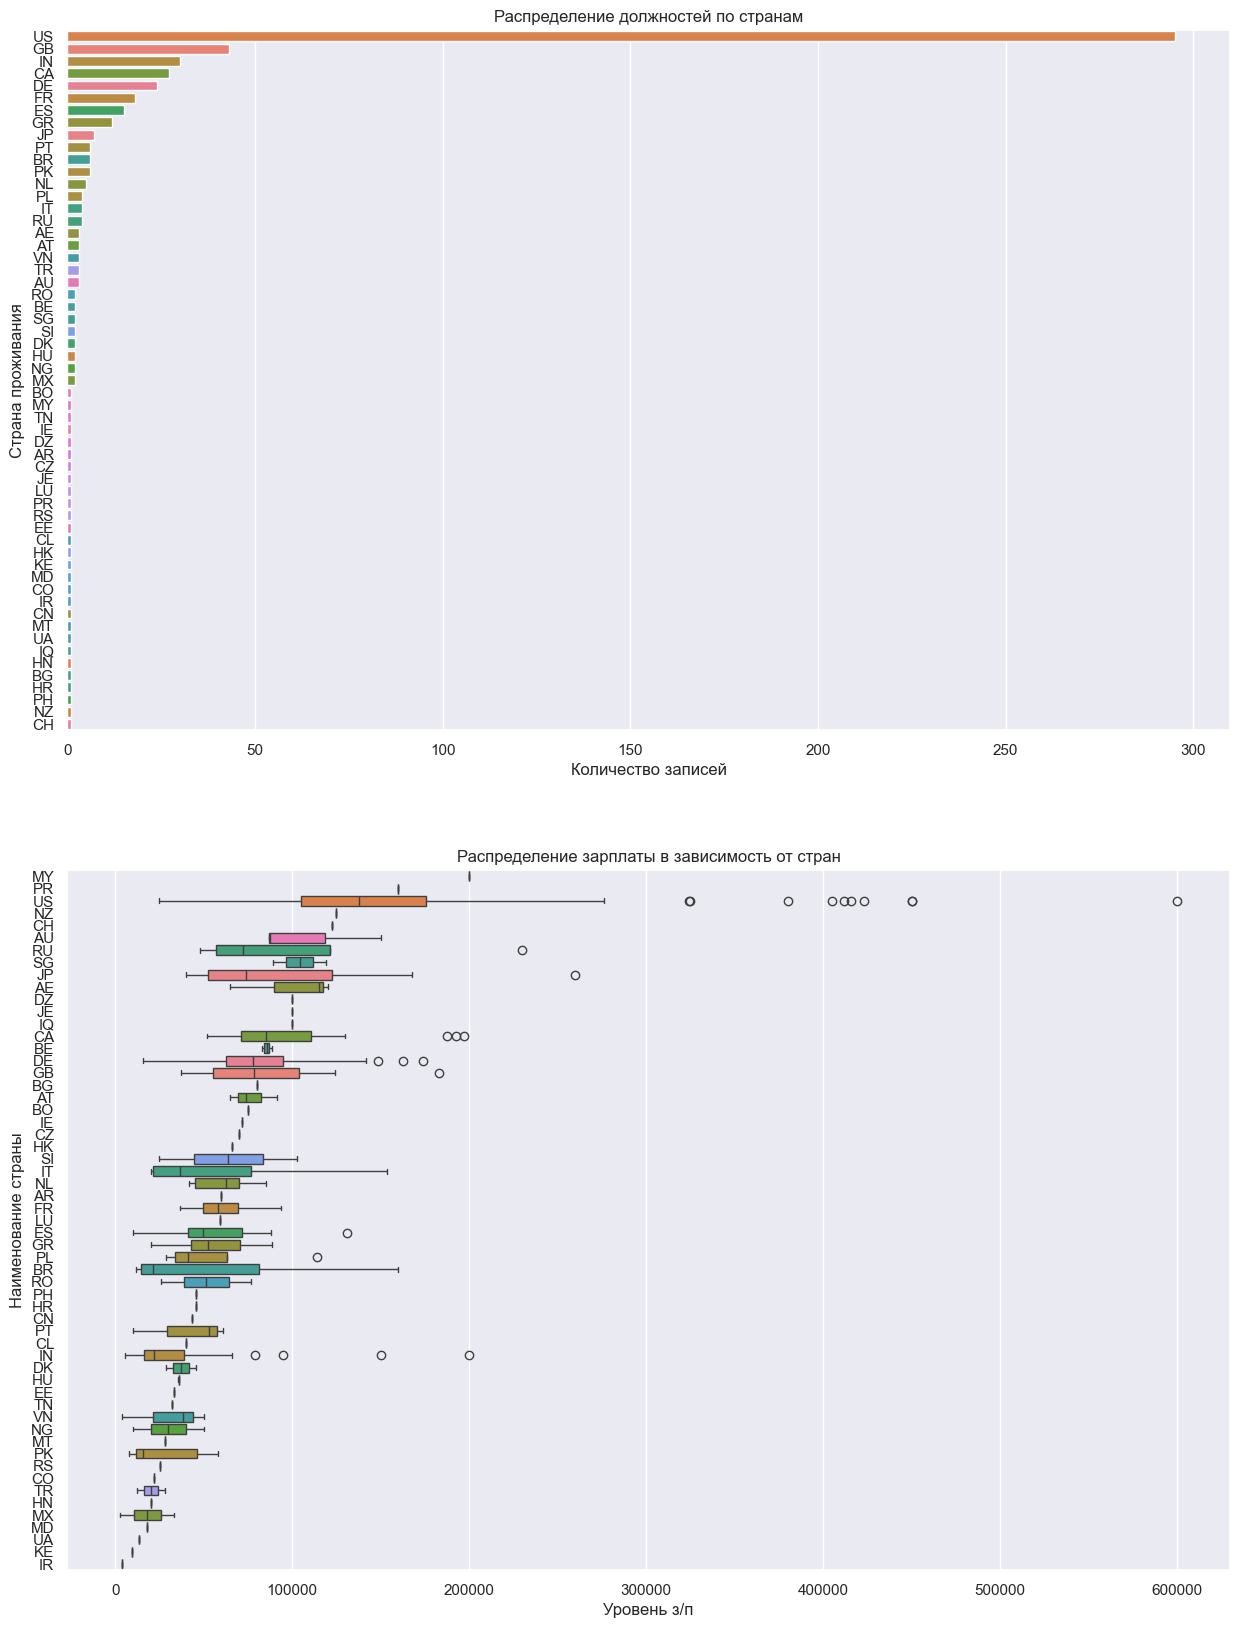

In [119]:
# Строим графики
fig, axes = plt.subplots(2, 1, figsize=(15, 20))

axes[0] = sns.countplot(data, y='employee_residence', ax=axes[0], order=data['employee_residence'].value_counts().index, hue='employee_residence')
axes[0].set(xlabel='Количество записей', ylabel='Страна проживания')
axes[0].set_title('Распределение должностей по странам')

# Считаем среднее для сортировки коробчатой диаграммы
mean_by_residence = data.groupby(['employee_residence'])['salary_in_usd'].mean().sort_values(ascending=False)

axes[1] = sns.boxplot(data, y='employee_residence', x='salary_in_usd',order=mean_by_residence.index,  ax=axes[1], hue='employee_residence')
axes[1].set(xlabel='Уровень з/п', ylabel='Наименование страны')
axes[1].set_title('Распределение зарплаты в зависимость от стран')

plt.show()

### Вывод:
Визуально видно, что самое большое количество сотрудников на интересующих нас должностях работают в США. Тамже находится самый высокий уровень, скорее всего признаки коррелируется с другим.

Проанализирую признак 'remote_ratio' - Общий объём работы, выполняемой удалённо.

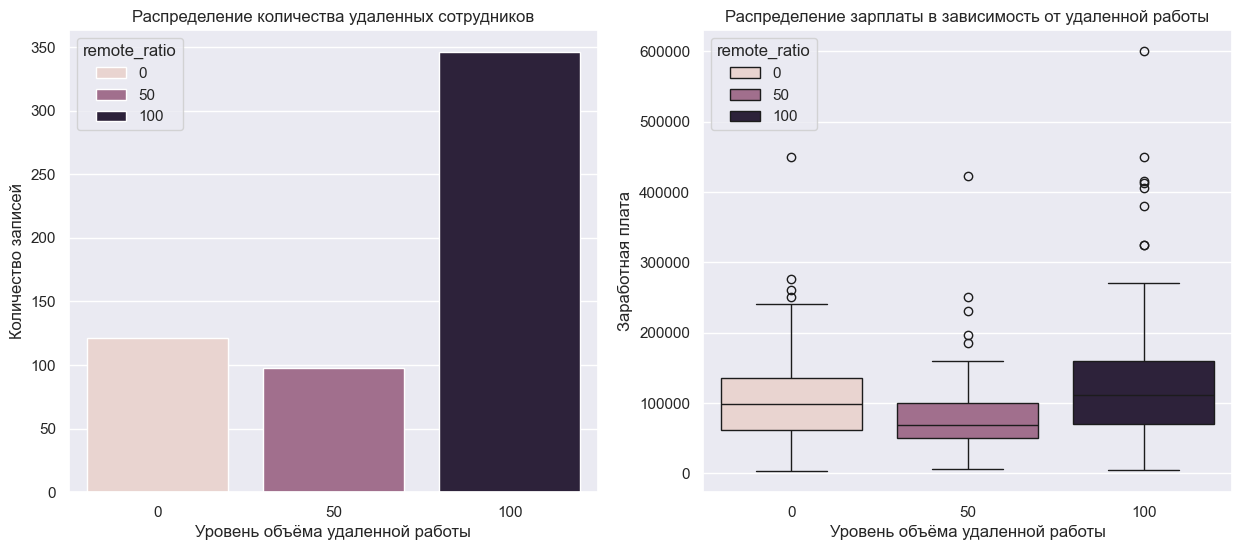

In [120]:
# Строим графики
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

axes[0] = sns.countplot(data, x='remote_ratio', ax=axes[0], hue='remote_ratio')
axes[0].set(xlabel='Уровень объёма удаленной работы', ylabel='Количество записей')
axes[0].set_title('Распределение количества удаленных сотрудников')


axes[1] = sns.boxplot(data, x='remote_ratio', y='salary_in_usd', ax=axes[1], hue='remote_ratio')
axes[1].set(xlabel='Уровень объёма удаленной работы', ylabel='Заработная плата')
axes[1].set_title('Распределение зарплаты в зависимость от удаленной работы')

plt.show()

### Вывод:
Из графиков видно, что преобладает полностью удаленная работа, также заработная плата сотрудников работающих полностью удалённо, выше остальных.

Проанализирую признак 'company_location' - Страна главного офиса работодателя.

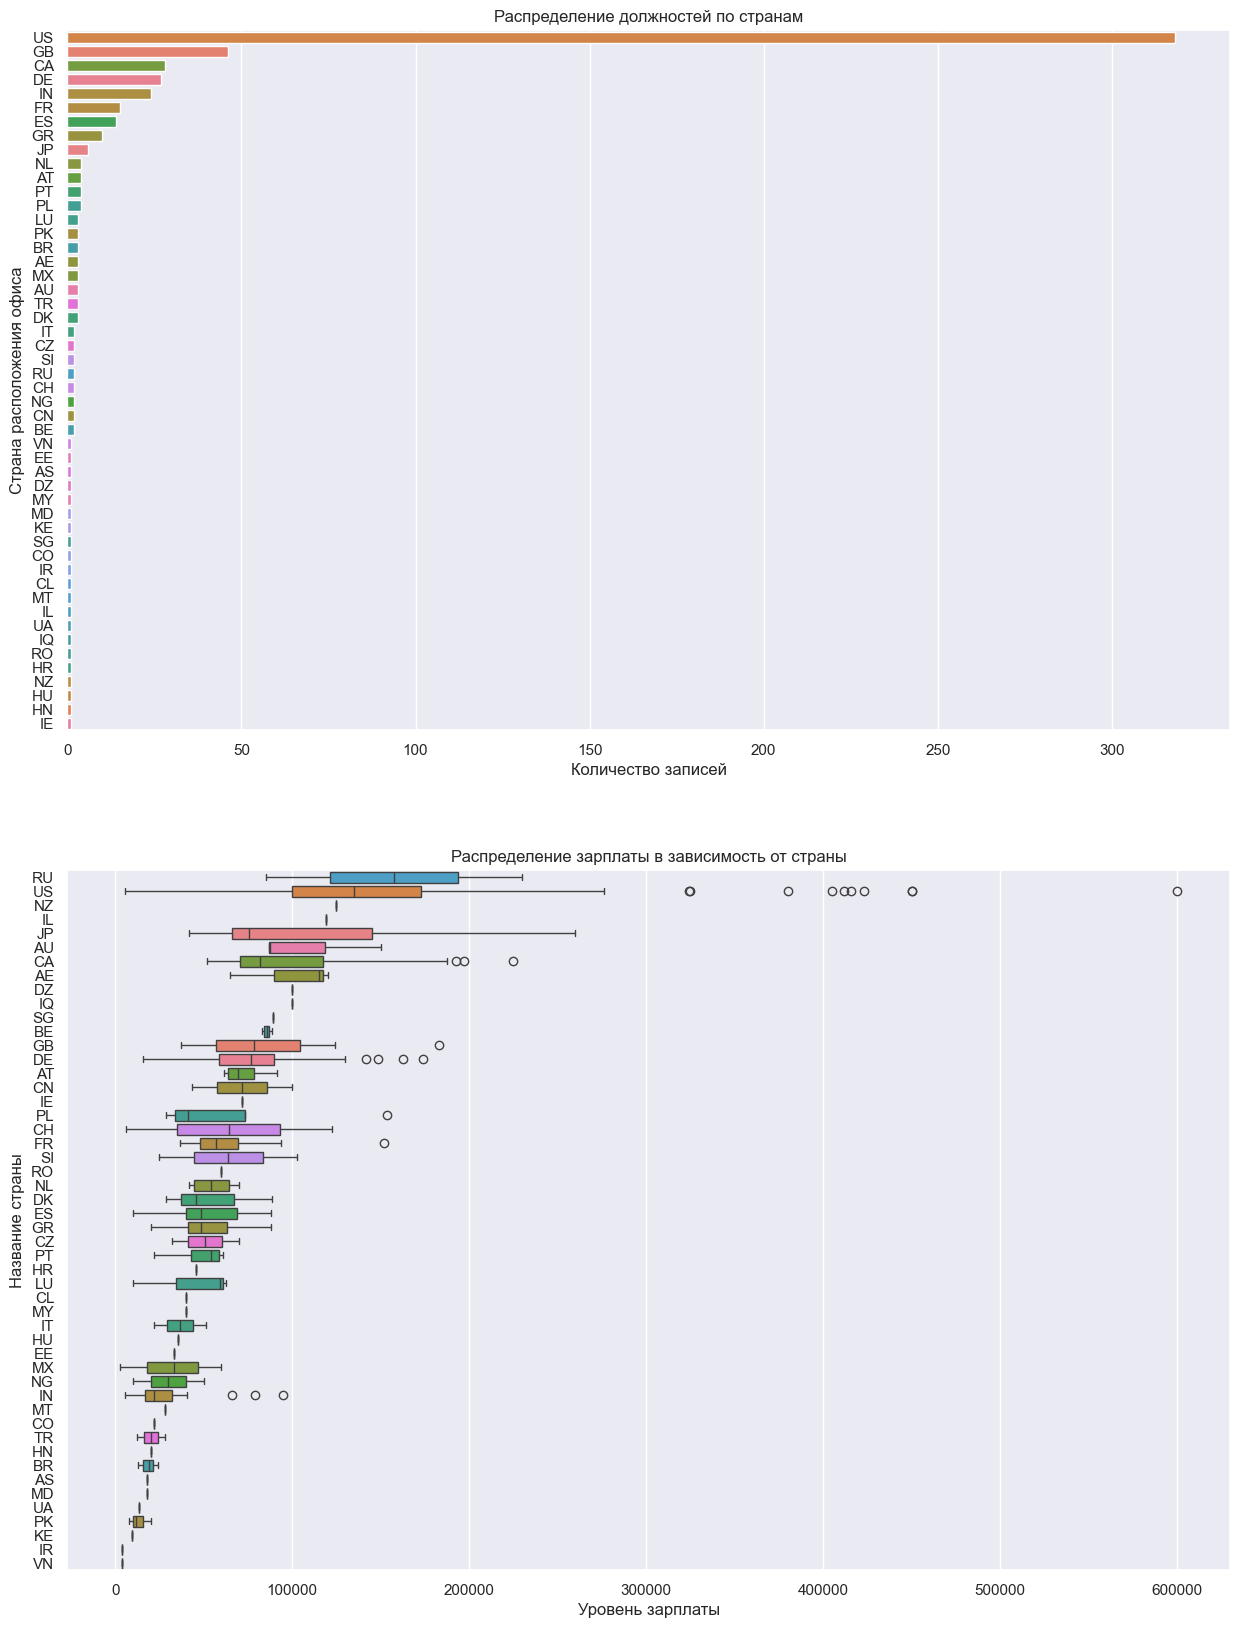

In [121]:
# Строим графики
fig, axes = plt.subplots(2, 1, figsize=(15, 20))

axes[0] = sns.countplot(data, y='company_location', ax=axes[0], order=data['company_location'].value_counts().index, hue='company_location')
axes[0].set(xlabel='Количество записей', ylabel='Страна расположения офиса')
axes[0].set_title('Распределение должностей по странам')

# Считаем среднее для сортировки коробчатой диаграммы
mean_by_location = data.groupby(['company_location'])['salary_in_usd'].mean().sort_values(ascending=False)

axes[1] = sns.boxplot(data, y='company_location', x='salary_in_usd',order=mean_by_location.index,  ax=axes[1], hue='company_location')
axes[1].set(xlabel='Уровень зарплаты', ylabel='Название страны')
axes[1].set_title('Распределение зарплаты в зависимость от страны')

plt.show()

### Вывод:
На графиках видно, что самый высокий уровень зарплат в России, США на втором месте, на третем месте Япония. Самое большое количество офиов находятся в США.

Проанализирую признак 'company_size' - Среднее количество людей, работавших в компании в течение года.


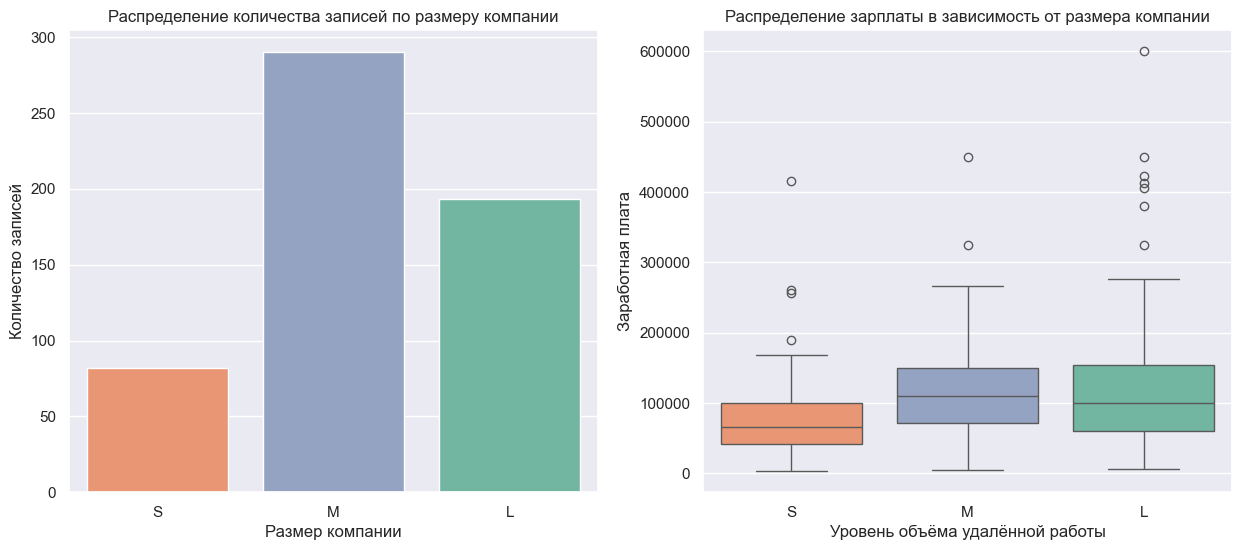

In [122]:
# Строим графики
order_size = ['S', 'M', 'L']
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

axes[0] = sns.countplot(data, x='company_size', order = order_size, ax=axes[0], hue='company_size')
axes[0].set(xlabel='Размер компании', ylabel='Количество записей')
axes[0].set_title('Распределение количества записей по размеру компании')


axes[1] = sns.boxplot(data, x='company_size', y='salary_in_usd', order = order_size, ax=axes[1], hue='company_size')
axes[1].set(xlabel='Уровень объёма удалённой работы', ylabel='Заработная плата')
axes[1].set_title('Распределение зарплаты в зависимость от размера компании')

plt.show()

### Вывод:
На графиках можно увидеть, что больше всего специалистов работают в средних компаниям. Также заиметно что медиана заработной платы в таких компаниях выше, чем в маленьких и больших.

#### Расчеты, для описания поставленных вопросов:

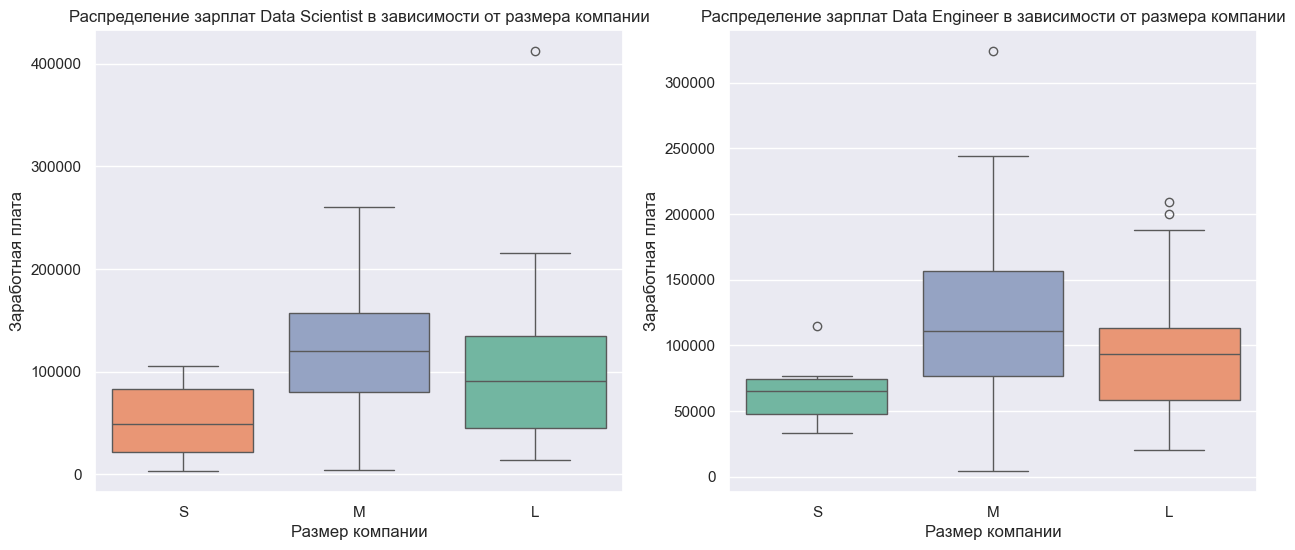

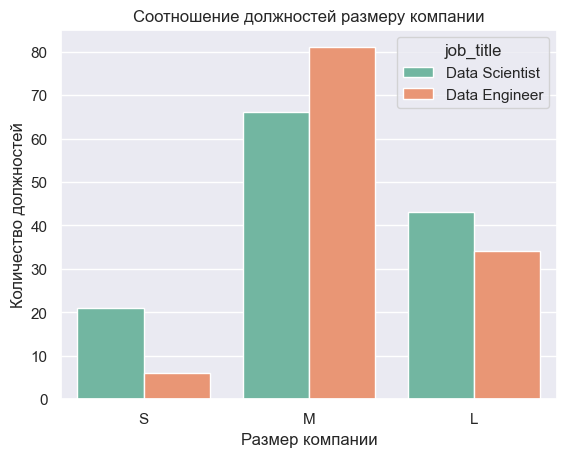

In [123]:
order_size = ['S', 'M', 'L']
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

axes[0] = sns.boxplot(data[data['job_title'] == 'Data Scientist'], x='company_size', y='salary_in_usd', order = order_size, ax=axes[0], hue='company_size')
axes[0].set(xlabel='Размер компании', ylabel='Заработная плата')
axes[0].set_title('Распределение зарплат Data Scientist в зависимости от размера компании')

axes[1] = sns.boxplot(data[data['job_title'] == 'Data Engineer'], x='company_size', y='salary_in_usd', order = order_size, ax=axes[1], hue='company_size')
axes[1].set(xlabel='Размер компании', ylabel='Заработная плата')
axes[1].set_title('Распределение зарплат Data Engineer в зависимости от размера компании')

plt.show()

data_ds_de = data[(data['job_title'] == 'Data Scientist') | (data['job_title'] == 'Data Engineer')]

ax = sns.countplot(data=data_ds_de, x=data_ds_de['company_size'], hue='job_title', order = order_size)
ax.set(xlabel='Размер компании', ylabel='Количество должностей')
plt.title('Соотношение должностей размеру компании')
plt.show()

### Общие выводы:

1. Наблюдается ли ежегодный рост зарплат у специалистов Data Scientist?  Да, наблюдается.
2. Какие факторы влияют на зарплату у специалистов Data Scientist?  Размер компании и страна трудоустройства влияют на зарплату специалистов.
3. Как соотносятся зарплаты Data Scientist и Data Engineer в различных компаниях?  Зависит от размера компании. Самые высокие зарплаты в средних и больших компаниях. Зарплата у Data Engineer выше, чем у Data Scientist.
4. Есть ли связь между наличием должностей Data Scientist и Data Engineer и размером компании?  Да, есть. Большинство должносткй в средних компания, также в средних компаниях количество специалистов Data Engineer больше чем Data Scientist. Самое маленькое количество специалистов Data Engineer в небольших компаниях

### <U>2.2. Статистический анализ данных (2 балла)</U>

In [124]:
# функция для принятия решения о нормальности
def decision_normality(p):
    """_function to make a decision about data normality_

    Args:
        p (_float_): _p-value_
    """
    print('p-value = {:.3f}'.format(p))
    if p <= alpha:
        print('p-значение меньше, чем заданный уровень значимости {:.2f}. Распределение отлично от нормального'.format(alpha))
    else:
        print('p-значение больше, чем заданный уровень значимости {:.2f}. Распределение является нормальным'.format(alpha))


# функция для принятия решения об отклонении нулевой гипотезы
def decision_hypothesis(p):
    """_function to make a decision about null hypothesis_

    Args:
        p (_float_): _p-value_
    """
    print('p-value = {:.3f}'.format(p))
    if p <= alpha:
        print('p-значение меньше, чем заданный уровень значимости {:.2f}. Отвергаем нулевую гипотезу в пользу альтернативной.'.format(alpha))
    else:
        print('p-значение больше, чем заданный уровень значимости {:.2f}. У нас нет оснований отвергнуть нулевую гипотезу.'.format(alpha))
      
# функция для проверки на равенство диспесий
def decision_dispersion(p):
    """_function to check dispersion equality_

    Args:
        p (_float_): _p-value_
    """
    print('p-value = {:.3f}'.format(p))
    if p <= alpha:
        print('Дисперсии не одинаковы, в stats.ttest_ind нужно использовать параметр equal_var=False.')
    else:
        print('Дисперсии одинаковы, в stats.ttest_ind нужно использовать параметр equal_var=True.')

### 1. Наблюдается ли ежегодный рост зарплат у специалистов Data Scientist?
#### Проверка на нормальность

Используем тест Шапиро-Уилка для проверки, распределения признака. 

*Гипотезы теста Шапиро-Уилка:*

$ H_0: $ распределение данные является нормальным.  
$ H_1: $ распределение данных отлично от нормального.

In [125]:
# Данные о DS по годам
ds_2020 = data[(data['job_title'] == 'Data Scientist') & (data['work_year']==2020)]
ds_2021 = data[(data['job_title'] == 'Data Scientist') & (data['work_year']==2021)]
ds_2022 = data[(data['job_title'] == 'Data Scientist') & (data['work_year']==2022)]

# Применим тест
print('2020:')
decision_normality(stats.shapiro(ds_2020['salary_in_usd'])[1])
print('*' * 8)
print('2021:')
decision_normality(stats.shapiro(ds_2021['salary_in_usd'])[1])
print('*' * 8)
print('2022:')
decision_normality(stats.shapiro(ds_2022['salary_in_usd'])[1])


2020:
p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального
********
2021:
p-value = 0.107
p-значение больше, чем заданный уровень значимости 0.05. Распределение является нормальным
********
2022:
p-value = 0.676
p-значение больше, чем заданный уровень значимости 0.05. Распределение является нормальным


### Вывод:
Распределение данных для 2020 года отличныо от нормального.
Выбираем Критерий Краскела — Уоллиса (однофакторный дисперсионный анализ на рангах) так как имеем три независимые группы.

*Сформулируем гипотезы:*

$ H_0: $ размер медианы зарплат Data Science в 2020, 2021 и 2022 годах одинаковые.  
$ H_1: $ размер медианы зарплат Data Science в 2020, 2021 и 2022 годах отличаются.

In [126]:
# Применяем Критерий Краскела-Уоллиса
_, p = stats.kruskal(ds_2020['salary_in_usd'], ds_2021['salary_in_usd'], ds_2022['salary_in_usd'])
decision_hypothesis(p)
q_1 = ds_2020['salary_in_usd'].median() < ds_2021['salary_in_usd'].median() < ds_2022['salary_in_usd'].median()
if q_1 == True:
    print('Медианные значения с увеличением года растут.')
else:
    print('Медианные значения с увеличением года не растут.')

p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу в пользу альтернативной.
Медианные значения с увеличением года растут.


### Вывод:
Ответ на вопрос "Наблюдается ли ежегодный рост зарплат у специалистов Data Scientist"? - Да, наблюдается. Медианные значения растут. Статистическая значимость гипотезы подтверждена.

### 2. Какие факторы влияют на зарплату у специалистов Data Scientist?

Для удобства расчетов закодируем признаки

In [139]:
# Кодируем признаки с типом данных 'object'
cols_df = [x for x in data.columns if data[x].dtype == 'object']
ord_encoder = ce.OrdinalEncoder()
data_exist = ord_encoder.fit_transform(data[data['job_title'] == 'Data Scientist'][cols_df])
data_coded = pd.concat([data, data_exist], axis=1)

# Используем корреляцию Кендала так как она устойчива к неочищенным данным
data_corr = data_coded.corr(method = 'kendall', numeric_only=True)
print('Факторы и их коэффициенты корреляции, которые влияют на зарплату у специалистов Data Scientist: {}'.format(
    [(i, data_corr[i]['salary_in_usd']) for i in data_corr.index if abs(data_corr[i]['salary_in_usd']) > 0.5][1:]))

Факторы и их коэффициенты корреляции, которые влияют на зарплату у специалистов Data Scientist: []


In [140]:
data_corr['salary_in_usd']

work_year             0.202905
salary_in_usd         1.000000
remote_ratio          0.128351
experience_level      0.359873
employment_type      -0.058145
job_title                  NaN
employee_residence    0.089895
company_location     -0.066834
company_size          0.178327
Name: salary_in_usd, dtype: float64

### Вывод:
Исходя из данных есть два фактора влияющиех на уровень зарплаты DS. Это тип трудоустройства и название должности. Название должности не будем брать в рассчёт потому что зарплата специалиста DS бдет только у DS.

Влияет ли размер компании на уровень заработной платы специалистов DS?

$ H_0: $ размер зарплаты специалистов DS в маленьких( S
), средних( M
) и больших( L
) компаниях одинаков.

$ H_1: $ размер зарплаты специалистов DS в маленьких( S
), средних( M
) и больших( L
) компаниях неодинаков.


Проверка на нормальность

In [ ]:


С помощью теста Шапиро-Уилка проверим, распределён ли признак нормально. Гипотезы теста Шапиро-Уилка:

Нулевая гипотеза (
): распределение данные является нормальным.

Альтернативная гипотеза (
): распределение данных отлично от нормального.

data_ds_S = data[(data['job_title'] == 'Data Scientist') & (data['company_size']=='S')]
data_ds_M = data[(data['job_title'] == 'Data Scientist') & (data['company_size']=='M')]
data_ds_L = data[(data['job_title'] == 'Data Scientist') & (data['company_size']=='L')]
print('\nДля компании S:')
decision_normality(stats.shapiro(data_ds_S['salary_in_usd'])[1])
print('\nДля компании M:')
decision_normality(stats.shapiro(data_ds_M['salary_in_usd'])[1])
print('\nДля компании L:')
decision_normality(stats.shapiro(data_ds_L['salary_in_usd'])[1])
Для компании S:
p-value = 0.189
p-значение больше, чем заданный уровень значимости 0.05. Распределение является нормальным

Для компании M:
p-value = 0.897
p-значение больше, чем заданный уровень значимости 0.05. Распределение является нормальным

Для компании L:
p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального
Выберем подходящий статистический тест

Для выбора нужного теста воспользуемся алгоритмом выбора теста, для этого ответим на следующие вопросы:

Какой тип у признака “зарплата”? - Количественный
Количество сравниваемых групп? - 3 группы
Группы зависимы? - Нет
Признак распределен по нормальному закону? - Нет
Для проверки нашей гипотезы можем использовать Критерий Краскела-Уоллиса.

Проведем тест

_, p = stats.kruskal(data_ds_S['salary_in_usd'], data_ds_L['salary_in_usd'], data_ds_M['salary_in_usd'])
decision_hypothesis(p)
p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу в пользу альтернативной.
Вывод:
Зарплата специалистов Data Scientist в маленьких, средних и больших компаниях различна

Вывод:
Ответ на вопрос "Какие факторы влияют на зарплату у специалистов Data Scientist?": На заработную плату у специалистов Data Scientist влияют:

Размер компании
Страна расположения компании
Тип занятости
Вопрос 3: Как соотносятся зарплаты Data Scientist и Data Engineer в различных компаниях?
# делаем выборки только для Data Engineer, т.к. для Data Scientist они подготовлены ранее

data_de_S = data[(data['job_title'] == 'Data Engineer') & (data['company_size']=='S')]
data_de_M = data[(data['job_title'] == 'Data Engineer') & (data['company_size']=='M')]
data_de_L = data[(data['job_title'] == 'Data Engineer') & (data['company_size']=='L')]
# проверка на нормальность

print('\nДля компании S:')
decision_normality(stats.shapiro(data_de_S['salary_in_usd'])[1])
print('\nДля компании M:')
decision_normality(stats.shapiro(data_de_M['salary_in_usd'])[1])
print('\nДля компании L:')
decision_normality(stats.shapiro(data_de_L['salary_in_usd'])[1])
Для компании S:
p-value = 0.606
p-значение больше, чем заданный уровень значимости 0.05. Распределение является нормальным

Для компании M:
p-value = 0.085
p-значение больше, чем заданный уровень значимости 0.05. Распределение является нормальным

Для компании L:
p-value = 0.109
p-значение больше, чем заданный уровень значимости 0.05. Распределение является нормальным
# проверка равенство дисперсий только S и M компаний, т.к. у L компаний распределение для DS не является нормальным и точно будет использоваться непараметрический тест
print('\nДля компании S:')
result = stats.levene(data_ds_S['salary_in_usd'], data_de_S['salary_in_usd'])
decision_dispersion(result[1])
print('\nДля компании M:')
result = stats.levene(data_ds_M['salary_in_usd'], data_de_M['salary_in_usd'])
decision_dispersion(result[1])
Для компании S:
p-value = 0.348
Дисперсии одинаковы, в stats.ttest_ind нужно использовать параметр equal_var=True.

Для компании M:
p-value = 0.689
Дисперсии одинаковы, в stats.ttest_ind нужно использовать параметр equal_var=True.
Выберем подходящий статистический тест для сравнения L компаний

Для выбора нужного теста воспользуемся алгоритмом выбора теста. Для этого ответим на следующие вопросы:

Какой тип у признака «Размер заработной платы»? — Количественный.
Сколько сравниваемых групп? — Две.
Группы зависимы? — Нет.
Признак распределён по нормальному закону? — Нет.
Чтобы проверить нашу гипотезу, можно использовать U-критерий Манна — Уитни для сравнения распределений на основе рангов.

Выберем подходящий статистический тест для сравнения S и M компаний

Для выбора нужного теста воспользуемся алгоритмом выбора теста. Для этого ответим на следующие вопросы:

Какой тип у признака «Размер заработной платы»? — Количественный.
Сколько сравниваемых групп? — Две.
Группы зависимы? — Нет.
Признак распределён по нормальному закону? — ДА.
Дисперсии одинаковы - Да
Чтобы проверить нашу гипотезу, можно использовать Двухвыборочный T-КРИТЕРИЙ.

Проведём тест

Сформулируем нулевую и альтернативные гипотезы

Нулевая гипотеза: размер зарплаты специалиста Data Science (
) меньше или равен размеру зарплаты специалиста Data Engineer (
):


Альтернативная гипотеза: размер зарплаты специалиста Data Science (
) больше размера зарплаты специалиста Data Engineer (
):


print('\nДля компании L:')
_, p = stats.mannwhitneyu(data_ds_L['salary_in_usd'], data_de_L['salary_in_usd'], alternative='greater')
decision_hypothesis(p)
print('\nДля компании M:')
_, p = stats.ttest_ind(data_ds_M['salary_in_usd'], data_de_M['salary_in_usd'], alternative='greater', equal_var=True)
decision_hypothesis(p)
print('\nДля компании S:')
_, p = stats.ttest_ind(data_ds_S['salary_in_usd'], data_de_S['salary_in_usd'], alternative='greater', equal_var=True)
decision_hypothesis(p)
Для компании L:
p-value = 0.451
p-значение больше, чем заданный уровень значимости 0.05. У нас нет оснований отвергнуть нулевую гипотезу.

Для компании M:
p-value = 0.430
p-значение больше, чем заданный уровень значимости 0.05. У нас нет оснований отвергнуть нулевую гипотезу.

Для компании S:
p-value = 0.827
p-значение больше, чем заданный уровень значимости 0.05. У нас нет оснований отвергнуть нулевую гипотезу.
Вывод:
Ответ на вопрос "Как соотносятся зарплаты Data Scientist и Data Engineer в различных компаниях?": во всех видах компаний размер зарплаты специалиста Data Science меньше или равен размеру зарплаты специалиста Data Engineer. т.е. нет оснований утверждать, что зарплата специалистов Data Scientist больше чем зарплата специалистов Data Engineer в каком-то виде компаний

Вопрос 4: Есть ли связь между наличием должностей Data Scientist и Data Engineer и размером компании?
# у нас уже есть таблица для DS и DE, будем ее использовать:

table = pd.crosstab(data_ds_de['job_title'], data_ds_de['company_size'])
table
# строить тепловую карту не целесообразно, размер таблицы 2 на 2
company_size	L	M	S
job_title			
Data Engineer	34	81	6
Data Scientist	43	66	21
Сформулируем нулевую и альтернативные гипотезы

Нулевая гипотеза: признаки «Должность» и «Размер компании» независимы.

Альтернативная гипотеза: признаки «Должность» и «Размер компании» взаимосвязаны

Выберем подходящий статистический тест

Будем использовать Критерий хи-квадрат

Проведем тест

_, p, _, _ = stats.chi2_contingency(table)
decision_hypothesis(p)
p-value = 0.005
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу в пользу альтернативной.
Вывод:
Ответ на вопрос "Есть ли связь между наличием должностей Data Scientist и Data Engineer и размером компании?": да, существует взаимосвязь между размером компании и должностями DS и DE.

Дополнительное исследование (2 балла)
Вопрос: Является ли зарплата специалиста Data Science, проживающих в США выше средней зарплаты по всем странам?
Сформулируем нулевую и альтернативные гипотезы

Нулевая гипотеза (
): средний уровень зарплаты специалистов DataScience, проживающих в США (
) ниже или равен среднему уровню зарплат по всем странам (
).


Альтернативная гипотеза (
): средний уровень зарплаты специалистов DataScience, проживающих в США (
) выше среднего уровня зарплат ппо всем странам (
).


Проверка на нормальность

С помощью теста Шапиро-Уилка проверим, распределён ли признак нормально. Гипотезы теста Шапиро-Уилка:

Нулевая гипотеза (
): распределение данные является нормальным.

Альтернативная гипотеза (
): распределение данных отлично от нормального.

data_ds_all = data[data['job_title']=='Data Scientist']
data_ds_us = data[(data['job_title']=='Data Scientist') & (data['employee_residence']=='US')]


print('Для специалистов DataScience вообще:')
result = stats.shapiro(data_ds_all['salary_in_usd'])
decision_normality(result[1])

print('\nДля специалистов DataScience в США:')
result = stats.shapiro(data_ds_us['salary_in_usd'])
decision_normality(result[1])
Для специалистов DataScience вообще:
p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального

Для специалистов DataScience в США:
p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального
Выберем подходящий статистический тест

Чтобы проверить нашу гипотезу, можно использовать U-критерий Манна — Уитни

_, p = stats.mannwhitneyu(data_ds_us['salary_in_usd'], data_ds_all['salary_in_usd'], alternative='greater')
decision_hypothesis(p)
p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу в пользу альтернативной.
Вывод:
Ответ на вопрос "Является ли зарплата специалиста Data Science, проживающих в США выше средней зарплаты по всем странам?": да, является

Вывод
Наблюдается ежегодный рост зарплат у специалистов Data Scientist.
На заработную плату у специалистов Data Scientist влияют следующие факторы:
Размер компании
Страна расположения компании
Тип занятости
Во всех видах компаний размер зарплаты специалиста Data Science меньше или равен размеру зарплаты специалиста Data Engineer, т.е. нет оснований утверждать, что зарплата специалистов Data Scientist больше чем зарплата специалистов Data Engineer в каком-то виде компаний
Существует взаимосвязь между размером компании и должностями Data Scientist и Data Engineer.
Зарплата специалиста Data Science, проживающих в США, выше средней зарплаты по всем странам.